# Visualizations for Mean Similarity and Standard Deviations Across Search Methods

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading Non-RAG Similarity Data

In [51]:
baseline = pd.read_pickle('./Non RAG Evaluation/open_ai_base_line_tested_data.pkl')

In [52]:
print(f"Mean Similarity: {baseline['similarities'].mean()}")
print(f"Standard Deviation: {baseline['similarities'].std()}")

Mean Similarity: 0.7271073540350634
Standard Deviation: 0.12402251979478449


In [53]:
finetuned = pd.read_pickle('./Non RAG Evaluation/open_ai_fine_tuned_tested_data.pkl')

In [54]:
print(f"Mean Similarity: {finetuned['similarities'].mean()}")
print(f"Standard Deviation: {finetuned['similarities'].std()}")

Mean Similarity: 0.7569534683827671
Standard Deviation: 0.15092024521740652


In [55]:
ft_CoT = pd.read_pickle('./Non RAG Evaluation/open_ai_CoT_prompting.pkl')

In [56]:
print(f"Mean Similarity: {ft_CoT['similarities'].mean()}")
print(f"Standard Deviation: {ft_CoT['similarities'].std()}")

Mean Similarity: 0.7354110307502733
Standard Deviation: 0.15435504707810854


In [57]:
ft_self_consistency = pd.read_pickle('./Non RAG Evaluation/open_ai_self_consistency_prompting.pkl')

In [58]:
ft_self_consistency['similarities'] = ft_self_consistency['similarity']
ft_self_consistency['model_output'] = ft_self_consistency['aggregated_output']

In [59]:
print(f"Mean Similarity: {ft_self_consistency['similarities'].mean()}")
print(f"Standard Deviation: {ft_self_consistency['similarities'].std()}")

Mean Similarity: 0.7238907042614755
Standard Deviation: 0.2004102768759991


# Loading RAG Similarity Data

In [60]:
baseline_rag = pd.read_csv('./Eval Results/gpt_4o_base_similarities.csv')

In [61]:
print(f"Mean Similarity: {baseline_rag['similarities'].mean()}")
print(f"Standard Deviation: {baseline_rag['similarities'].std()}")

Mean Similarity: 0.7553352984661562
Standard Deviation: 0.1290664422819455


In [62]:
finetuned_rag = pd.read_csv('./Eval Results/gpt_4o_finetuned_similarities.csv')

In [63]:
print(f"Mean Similarity: {finetuned_rag['similarities'].mean()}")
print(f"Standard Deviation: {finetuned_rag['similarities'].std()}")

Mean Similarity: 0.7709224707018043
Standard Deviation: 0.1529790971241027


In [64]:
ft_CoT_rag = pd.read_csv('./Eval Results/gpt_4o_finetuned_similarities_CoT.csv')

In [65]:
print(f"Mean Similarity: {ft_CoT_rag['similarities'].mean()}")
print(f"Standard Deviation: {ft_CoT_rag['similarities'].std()}")

Mean Similarity: 0.7260510222713111
Standard Deviation: 0.17342346616164672


In [66]:
ft_self_consistency_rag = pd.read_csv('./Eval Results/gpt_4o_finetuned_similarities_SelfConsistency.csv')

In [67]:
ft_self_consistency_rag['similarities'] = ft_self_consistency_rag['similarity']
ft_self_consistency_rag['model_output'] = ft_self_consistency_rag['aggregated_output']

In [68]:
print(f"Mean Similarity: {ft_self_consistency_rag['similarities'].mean()}")
print(f"Standard Deviation: {ft_self_consistency_rag['similarities'].std()}")

Mean Similarity: 0.6193781853603966
Standard Deviation: 0.3085480235209887


In [69]:
data = {
    "Search Method": ["Base GPT-4o-mini", "Fine-tuned GPT-4o-mini", 
                      "FT GPT-4o-mini + CoT", "FT GPT-4o-mini + Self-Consistency", 
                      "Base GPT-4o-mini + RAG", "FT GPT-4o-mini + RAG", 
                      "FT GPT-4o-mini + RAG + CoT", "FT GPT-4o-mini + RAG + Self-Consistency"],
    "Mean Similarity": [0.727, 0.757, 
                        0.735, 0.724,
                        0.755, 0.771,
                        0.726, 0.619],
    "Standard Deviation": [0.124, 0.151, 
                           0.154, 0.200,
                           0.129, 0.153,
                           0.173, 0.309]
}

In [70]:
df = pd.DataFrame(data)

/var/folders/3s/xkq8dww92kg59vrzltq5wfr00000gn/T/ipykernel_89224/1194447285.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/3s/xkq8dww92kg59vrzltq5wfr00000gn/T/ipykernel_89224/1194447285.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


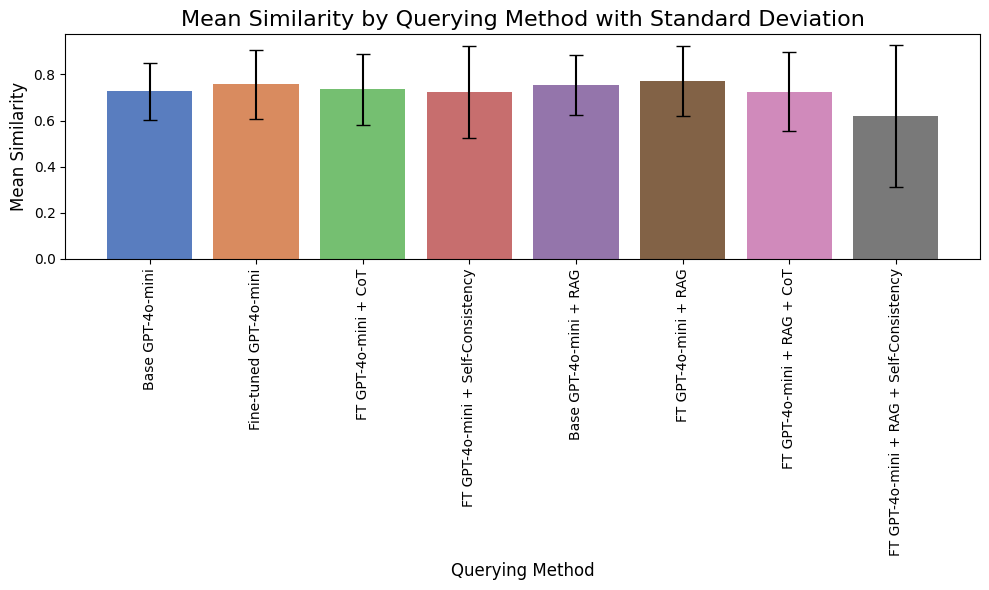

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x="Search Method",
    y="Mean Similarity",
    ci=None,  # Disable Seaborn's confidence interval calculation
    palette="muted"
)

# Add error bars manually
plt.errorbar(
    x=df["Search Method"],
    y=df["Mean Similarity"],
    yerr=df["Standard Deviation"],
    fmt='none',  # Don't add markers for error bars
    c='black',
    capsize=5,  # Add caps to error bars
    linewidth=1.5
)

# Customize the plot
plt.title("Mean Similarity by Querying Method with Standard Deviation", fontsize=16)
plt.xlabel("Querying Method", fontsize=12)
plt.ylabel("Mean Similarity", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

## ROUGE-L Sum

In [73]:
import pandas as pd
from rouge import Rouge
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# Combine all datasets into a dictionary for processing
methods = {
    "Baseline": baseline,
    "Fine-Tuned": finetuned,
    "Fine-Tuned + CoT": ft_CoT,
    "Fine-Tuned + Self-Consistency": ft_self_consistency,
    "Baseline + RAG": baseline_rag,
    "Fine-Tuned + RAG": finetuned_rag,
    "Fine-Tuned + CoT + RAG": ft_CoT_rag,
    "Fine-Tuned + Self-Consistency + RAG": ft_self_consistency_rag
}

# Initialize ROUGE scorer
rouge = Rouge()

# Dictionary to store ROUGE-L sums for each method
rouge_l_sums = {}

for method, df in methods.items():
    print(f"Processing method: {method}")
    
    # Ensure `model_output` and `expected_output` are strings
    df["model_output"] = df["model_output"].astype(str)
    df["expected_output"] = df["expected_output"].astype(str)
    
    # Filter out rows where either column is empty
    df = df[(df["model_output"].str.strip() != "") & (df["expected_output"].str.strip() != "")]
    
    # Calculate ROUGE-L for each row
    df["rouge_l"] = df.apply(
        lambda row: rouge.get_scores(row["model_output"], row["expected_output"])[0]["rouge-l"]["f"],
        axis=1
    )
    
    # Sum ROUGE-L scores
    rouge_l_sums[method] = df["rouge_l"].sum()

# Convert results to DataFrame for plotting
rouge_l_df = pd.DataFrame.from_dict(rouge_l_sums, orient="index", columns=["ROUGE-L Sum"]).reset_index()
rouge_l_df.rename(columns={"index": "Method"}, inplace=True)

# Print the resulting DataFrame for debugging
print(rouge_l_df)

Processing method: Baseline
Processing method: Fine-Tuned
Processing method: Fine-Tuned + CoT
Processing method: Fine-Tuned + Self-Consistency
Processing method: Baseline + RAG
Processing method: Fine-Tuned + RAG
Processing method: Fine-Tuned + CoT + RAG
Processing method: Fine-Tuned + Self-Consistency + RAG
                                Method  ROUGE-L Sum
0                             Baseline   356.420484
1                           Fine-Tuned   765.607909
2                     Fine-Tuned + CoT   703.768903
3        Fine-Tuned + Self-Consistency   786.140380
4                       Baseline + RAG   486.016221
5                     Fine-Tuned + RAG   823.733806
6               Fine-Tuned + CoT + RAG   732.755835
7  Fine-Tuned + Self-Consistency + RAG   682.080900


/var/folders/3s/xkq8dww92kg59vrzltq5wfr00000gn/T/ipykernel_89224/58831403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rouge_l_df, x="Method", y="ROUGE-L Sum", palette="muted")


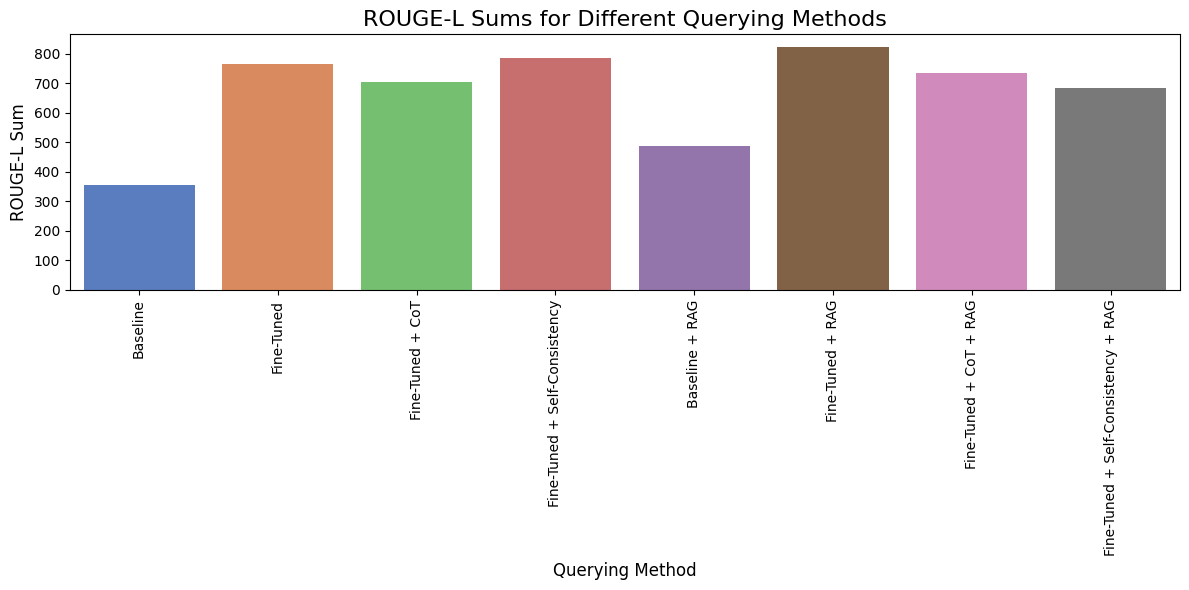

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(data=rouge_l_df, x="Method", y="ROUGE-L Sum", palette="muted")
plt.title("ROUGE-L Sums for Different Querying Methods", fontsize=16)
plt.xlabel("Querying Method", fontsize=12)
plt.ylabel("ROUGE-L Sum", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()